# 实验3：全连接层神经网络模型构建与应用实验

## (1)仿照第4.5.2节内容（全连接神经网络拟合非线性回归函数y=x0.6+sinx），自行拟定一个目标函数(如三次多项式、五次多项式、指数函数等），并加上干扰噪声，生成训练样本集和测试样本集。
## (2)在TensorFlow中，采用函数式或者顺序式方法构建不同结构的神经网络模型。
## (3)对构建好的神经模型进行训练，观察并记录训练完成的模型在训练集和测试集上的MSE值。
## (4)写出实验过程，分析模型结构与MSE之间的关系，提交实验报告。

### 1.构造训练样本集和测试样本集
#### 1.1仿照第4.5.2节内容（全连接神经网络拟合非线性回归函数y=x^0.6+sinx），使用def f(x)自定义一个新的目标函数(如三次多项式、五次多项式、指数函数等），并加上干扰噪声（np.random.normal生成噪音），生成训练样本集和测试样本集。

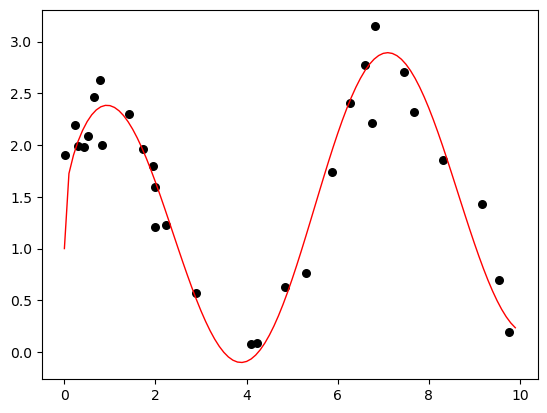

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1101)
def f(x):
    return x**0.2 + np.sin(x) + np.cos(x)

def get_data(num, start, end):
    for _ in range(num):
        x = np.random.uniform(start, end)
        noise = np.random.normal(0, 0.3)
        y = f(x) + noise
        yield np.array([x]).astype(np.float32), np.array([y]).astype(np.float32)

start = 0.0
end = 10.0 
data_number = 30 
repeat_size = 1

train_data = list(get_data(data_number, start, end)) 
x_train, y_train = zip(*train_data) 
plt.scatter(x_train, y_train, color="black", s=30)

x_test = np.arange(start, end, 0.1)
y_test = f(x_test)
plt.plot(x_test, y_test, color="red", linewidth=1, linestyle='-')
plt.show()

In [2]:
# 归一化训练样本标签值
miny = np.inf
maxy = -1 * np.inf
for i in range(len(train_data)): 
    train_data[i] = list(train_data[i])
for data in train_data:
    if data[1] > maxy:
        maxy = data[1]
    if data[1] < miny:
        miny = data[1]
step = maxy - miny
for data in train_data:
    data[1] = ( data[1] - miny ) / step
y_train_s = np.array(y_train)
for i in range(len(y_train_s)): 
    y_train_s[i] = ( y_train_s[i] - miny ) / step
y_train_s = y_train_s.reshape(-1)
x_train = np.array(x_train)
x_train = x_train.reshape(-1)

### 2.构建神经网络模型
#### 2.1 在TensorFlow中，采用函数式keras.Model或顺序式keras.Sequential方法构建（设置Dence层、每层神经元个数、激活函数、损失函数、优化器等）的神经网络模型。
#### 2.2 编译配置模型compile()，配置优化器、损失函数

In [3]:
import tensorflow as tf
inputs = tf.keras.layers.Input(shape=(1,)) 

x1 = tf.keras.layers.Dense(5, activation='sigmoid')(inputs)
x2 = tf.keras.layers.Dense(5, activation='sigmoid')(x1)
x3 =tf.keras.layers.Dense(5, activation='sigmoid')(x2)
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x3)

tf_model = tf.keras.Model(inputs=inputs,outputs=predictions)

2024-04-30 20:20:00.111210: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-30 20:20:00.155604: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-30 20:20:00.155640: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-30 20:20:00.155665: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-30 20:20:00.164123: I tensorflow/core/platform/cpu_feature_g

In [4]:
import tensorflow.keras as keras
tf_model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss='mean_squared_error')
tf_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 5)                 10        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 76 (304.00 Byte)
Trainable params: 76 (304.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 3.训练神经网络模型
#### 3.1 对构建好的神经模型进行训练（设置迭代次数、批次大小等）

In [5]:
tf_epoch = 1000   
batch_size = 5 
tf_model.fit(x_train, y_train_s, batch_size=batch_size, epochs=tf_epoch, verbose=0) 

2024-04-30 20:20:05.095072: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fce0913e920 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-30 20:20:05.095136: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce MX450, Compute Capability 7.5
2024-04-30 20:20:05.106187: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2024-04-30 20:20:05.177226: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


### 4.用测试集数据预测和评估模型
#### 4.1 用matplotlib画出预测的拟合曲线图和原始函数图
#### 4.2 观察并记录训练完成的模型在训练集和测试集上的MSE值

4/4 [==============================] - 0s 4ms/step


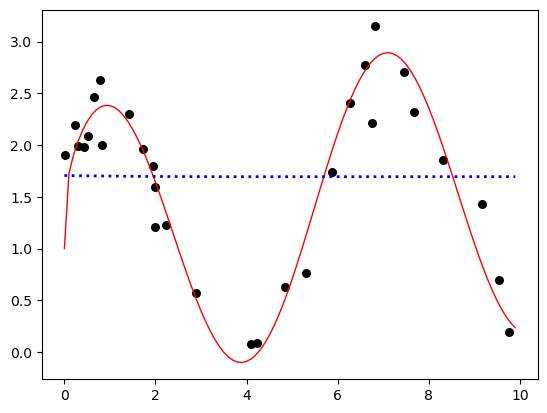

输出测试集的MSE 0.9759762618091845


In [6]:
pred_y_test = tf_model.predict(x_test)
for i in range(len(pred_y_test)):
    pred_y_test[i] = miny + pred_y_test[i] * step
pred_y_test = pred_y_test.reshape(-1)

plt.scatter(x_train, y_train, color="black", s=30)  
plt.plot(x_test, y_test, color="red", linewidth=1, linestyle='-') 
plt.plot(x_test, pred_y_test, color="blue", linewidth=2, linestyle=':')
plt.show()

from sklearn.metrics import mean_squared_error
print("输出测试集的MSE",mean_squared_error(y_test,pred_y_test))   #输出测试集的MSE

In [7]:
# 改用adam优化器
tf_epoch = 1000
tf_model.compile(optimizer='adam', loss='mean_squared_error')   #Adam优化器来更新模型的权重
tf_model.fit(x_train, y_train_s, batch_size=batch_size, epochs=tf_epoch, verbose=0)

2024-04-30 20:20:32.355256: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


4/4 [==============================] - 0s 4ms/step


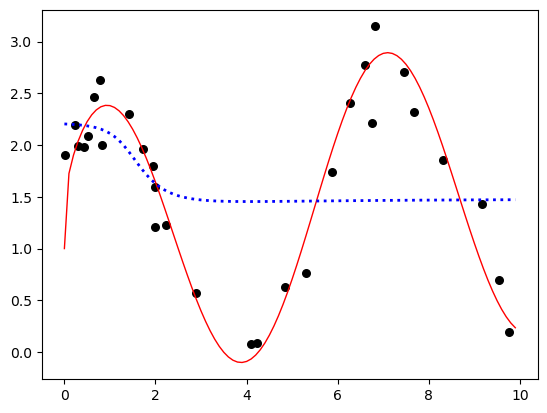

输出测试集的MSE 0.8426534460687212


In [8]:
pred_y_test = tf_model.predict(x_test) 
for i in range(len(pred_y_test)): 
    pred_y_test[i] = miny + pred_y_test[i] * step  
pred_y_test = pred_y_test.reshape(-1)

plt.scatter(x_train, y_train, color="black", s=30)  
plt.plot(x_test, y_test, color="red", linewidth=1, linestyle='-')
plt.plot(x_test, pred_y_test, color="blue", linewidth=2, linestyle=':')  
plt.show()

from sklearn.metrics import mean_squared_error
print("输出测试集的MSE",mean_squared_error(y_test,pred_y_test))   

### 5.更改神经网络的结构或编译配置、训练参数，查看和之前的神经网络模型，查看MSE和拟合出的曲线有什么不同，分析模型结构与MSE之间的关系
#### 5.1 可尝试更改隐藏层个数、神经元个数、优化器、迭代次数等参数（任意一种即可）

In [9]:
import tensorflow as tf
inputs = tf.keras.layers.Input(shape=(1,)) 

x1 = tf.keras.layers.Dense(500, activation='sigmoid')(inputs)
x2 = tf.keras.layers.Dense(500, activation='sigmoid')(x1)
x3 =tf.keras.layers.Dense(500, activation='sigmoid')(x2)
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x3)

tf_model = tf.keras.Model(inputs=inputs,outputs=predictions)
tf_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_4 (Dense)             (None, 500)               1000      
                                                                 
 dense_5 (Dense)             (None, 500)               250500    
                                                                 
 dense_6 (Dense)             (None, 500)               250500    
                                                                 
 dense_7 (Dense)             (None, 1)                 501       
                                                                 
Total params: 502501 (1.92 MB)
Trainable params: 502501 (1.92 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# 改用adam优化器
tf_model.compile(optimizer='adam', loss='mean_squared_error')   
tf_model.fit(x_train, y_train_s, batch_size=batch_size, epochs=tf_epoch, verbose=0)

4/4 [==============================] - 0s 2ms/step
输出测试集的MSE 0.046787143059974674


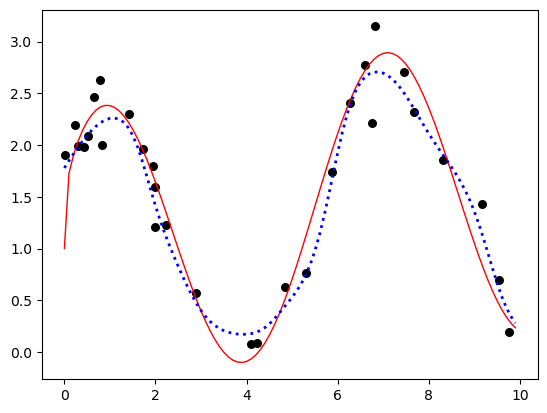

In [11]:
pred_y_test = tf_model.predict(x_test)  
for i in range(len(pred_y_test)): 
    pred_y_test[i] = miny + pred_y_test[i] * step  
pred_y_test = pred_y_test.reshape(-1)

plt.scatter(x_train, y_train, color="black", s=30)  
plt.plot(x_test, y_test, color="red", linewidth=1, linestyle='-') 
plt.plot(x_test, pred_y_test, color="blue", linewidth=2, linestyle=':')  

from sklearn.metrics import mean_squared_error
print("输出测试集的MSE",mean_squared_error(y_test,pred_y_test)) 